In [1]:
import nltk

In [2]:
import re

In [3]:
from nltk.tokenize import word_tokenize

In [4]:
from nltk.probability import FreqDist

In [5]:
import matplotlib.pyplot as plt

ID do corpus

In [6]:
nltk_id = 'machado'


In [7]:
nltk.download(nltk_id)

[nltk_data] Downloading package machado to /root/nltk_data...


True

In [8]:
print(nltk.corpus.machado.readme())

Machado de Assis -- Obra Completa

http://machado.mec.gov.br/

Public Domain

Contents:

Romance

romance/marm01.txt: Ressurreição (1872)
romance/marm02.txt: A Mão e a Luva (1874)
romance/marm03.txt: Helena (1876)
romance/marm04.txt: Iaiá Garcia (1878)
romance/marm05.txt: Memórias Póstumas de Brás Cubas (1881)
romance/marm06.txt: Casa Velha (1885)
romance/marm07.txt: Quincas Borba (1891)
romance/marm08.txt: Dom Casmurro (1899)
romance/marm09.txt: Esaú e Jacó (1904)
romance/marm10.txt: Memorial de Aires (1908)

Poesia

poesia/maps01.txt: Crisálidas (1864)
poesia/maps02.txt: Falenas (1870)
poesia/maps03.txt: Americanas (1875)
poesia/maps04.txt: Gazeta de Holanda (1886-88)
poesia/maps05.txt: Ocidentais (1901)
poesia/maps06.txt: O Almada (1908)
poesia/maps07.txt: Dispersas (1854-1939)

Contos

contos/macn001.txt: Contos Fluminenses (1870); Miss Dollar; Luís Soares; A mulher de preto; O segredo de Augusta; Confissões de uma viúva moça; Linha reta e linha curva; Frei Sim
contos/macn002.txt: 

In [10]:
contos = nltk.corpus.machado.raw('contos/macn005.txt')

In [11]:
print(contos)

Conto, Várias histórias, 1896

Várias Histórias

Texto-fonte:

Obra Completa, Machado de Assis, vol. II,

Rio de Janeiro: Nova Aguilar, 1994.

Publicado originalmente por
Laemmert & C. Editores, Rio de Janeiro em 1896.

ÍNDICE

ADVERTÊNCIA

A CARTOMANTE

ENTRE SANTOS

UNS BRAÇOS

UM HOMEM CÉLEBRE

A DESEJADA DAS GENTES

A CAUSA SECRETA

TRIO EM LÁ MENOR

ADÃO E EVA

O ENFERMEIRO

O DIPLOMÁTICO

MARIANA

CONTO DE ESCOLA

UM APÓLOGO

D. PAULA

VIVER!

O CÔNEGO OU METAFÍSICA DO ESTILO

ADVERTÊNCIA

Mon ami, faisons toujours
des contes...

Le temps se passe, et le
conte de la vie

s'achève, sans qu'on s'en
aperçoive.

Diderot.

As várias histórias que formam
este volume foram escolhidas entre outras, e podiam ser acrescentadas, se não
conviesse limitar o livro às suas trezentas páginas. É a quinta coleção que dou
ao público. As palavras de Diderot que vão por epígrafe no rosto desta coleção
servem de desculpa aos que acharem excessivos tantos contos. É um modo de
passar o tempo. Não preten

Vamos fazer o seguinte:
* Selecionar apenas letras (remover pontuação, números e outros caracteres)
* Converter o texto para letra minúscula

In [12]:
contos_letras_min =  re.findall(r'\b[A-zÀ-úü]+\b', contos.lower())

In [13]:
print(contos_letras_min)

['conto', 'várias', 'histórias', 'várias', 'histórias', 'texto', 'fonte', 'obra', 'completa', 'machado', 'de', 'assis', 'vol', 'ii', 'rio', 'de', 'janeiro', 'nova', 'aguilar', 'publicado', 'originalmente', 'por', 'laemmert', 'c', 'editores', 'rio', 'de', 'janeiro', 'em', 'índice', 'advertência', 'a', 'cartomante', 'entre', 'santos', 'uns', 'braços', 'um', 'homem', 'célebre', 'a', 'desejada', 'das', 'gentes', 'a', 'causa', 'secreta', 'trio', 'em', 'lá', 'menor', 'adão', 'e', 'eva', 'o', 'enfermeiro', 'o', 'diplomático', 'mariana', 'conto', 'de', 'escola', 'um', 'apólogo', 'd', 'paula', 'viver', 'o', 'cônego', 'ou', 'metafísica', 'do', 'estilo', 'advertência', 'mon', 'ami', 'faisons', 'toujours', 'des', 'contes', 'le', 'temps', 'se', 'passe', 'et', 'le', 'conte', 'de', 'la', 'vie', 's', 'achève', 'sans', 'qu', 'on', 's', 'en', 'aperçoive', 'diderot', 'as', 'várias', 'histórias', 'que', 'formam', 'este', 'volume', 'foram', 'escolhidas', 'entre', 'outras', 'e', 'podiam', 'ser', 'acrescenta

Agora vamos remover as stopwords, ou seja, as palavras que não possuem valor semântico para a busca (exemplo: artigos e preposições. O NLTK fornece bibliotecas de stopwords para vários idiomas.

In [14]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [15]:
stopwords = nltk.corpus.stopwords.words('portuguese')

In [16]:
print(stopwords)

['a', 'à', 'ao', 'aos', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aquilo', 'as', 'às', 'até', 'com', 'como', 'da', 'das', 'de', 'dela', 'delas', 'dele', 'deles', 'depois', 'do', 'dos', 'e', 'é', 'ela', 'elas', 'ele', 'eles', 'em', 'entre', 'era', 'eram', 'éramos', 'essa', 'essas', 'esse', 'esses', 'esta', 'está', 'estamos', 'estão', 'estar', 'estas', 'estava', 'estavam', 'estávamos', 'este', 'esteja', 'estejam', 'estejamos', 'estes', 'esteve', 'estive', 'estivemos', 'estiver', 'estivera', 'estiveram', 'estivéramos', 'estiverem', 'estivermos', 'estivesse', 'estivessem', 'estivéssemos', 'estou', 'eu', 'foi', 'fomos', 'for', 'fora', 'foram', 'fôramos', 'forem', 'formos', 'fosse', 'fossem', 'fôssemos', 'fui', 'há', 'haja', 'hajam', 'hajamos', 'hão', 'havemos', 'haver', 'hei', 'houve', 'houvemos', 'houver', 'houvera', 'houverá', 'houveram', 'houvéramos', 'houverão', 'houverei', 'houverem', 'houveremos', 'houveria', 'houveriam', 'houveríamos', 'houvermos', 'houvesse', 'houvessem', 'houvésse

In [17]:
list_stopwords_portuguese = set(stopwords)

In [19]:
contos_letras_min_semstop = [w for w in contos_letras_min if w not in list_stopwords_portuguese]

In [20]:
print(contos_letras_min_semstop)

['conto', 'várias', 'histórias', 'várias', 'histórias', 'texto', 'fonte', 'obra', 'completa', 'machado', 'assis', 'vol', 'ii', 'rio', 'janeiro', 'nova', 'aguilar', 'publicado', 'originalmente', 'laemmert', 'c', 'editores', 'rio', 'janeiro', 'índice', 'advertência', 'cartomante', 'santos', 'uns', 'braços', 'homem', 'célebre', 'desejada', 'gentes', 'causa', 'secreta', 'trio', 'lá', 'menor', 'adão', 'eva', 'enfermeiro', 'diplomático', 'mariana', 'conto', 'escola', 'apólogo', 'd', 'paula', 'viver', 'cônego', 'metafísica', 'estilo', 'advertência', 'mon', 'ami', 'faisons', 'toujours', 'des', 'contes', 'le', 'temps', 'passe', 'et', 'le', 'conte', 'la', 'vie', 's', 'achève', 'sans', 'qu', 'on', 's', 'en', 'aperçoive', 'diderot', 'várias', 'histórias', 'formam', 'volume', 'escolhidas', 'outras', 'podiam', 'acrescentadas', 'conviesse', 'limitar', 'livro', 'trezentas', 'páginas', 'quinta', 'coleção', 'dou', 'público', 'palavras', 'diderot', 'vão', 'epígrafe', 'rosto', 'desta', 'coleção', 'servem'

Também podemos trabalhar com radicais (stemming). Existem duas formas aqui:

*   Stemming - "corta" as palavras usando a raiz como base
*   Lemmatization - reduz as palavras a forma verdadeira da raiz

Exemplo: andando

*   Stemming - anda
*   Lemmatization - andar

Lemmatization é uma função mais complexa, portanto, se o texto for muito grande pode demorar um pouco para executá-la.

O nltk possui duas funções para stemming: Porter (PorterStemmer) e Lancaster (LancasterStemmer). Ele também possui um lemmatizador (WordNetLemmatizer).


In [21]:
porter = nltk.PorterStemmer()

In [23]:
contos_letras_min_semstop_stem = [porter.stem(t) for t in contos_letras_min_semstop]

In [24]:
print(contos_letras_min_semstop_stem)

['conto', 'vária', 'história', 'vária', 'história', 'texto', 'font', 'obra', 'completa', 'machado', 'assi', 'vol', 'ii', 'rio', 'janeiro', 'nova', 'aguilar', 'publicado', 'originalment', 'laemmert', 'c', 'editor', 'rio', 'janeiro', 'índice', 'advertência', 'cartomant', 'santo', 'un', 'braço', 'homem', 'célebr', 'desejada', 'gent', 'causa', 'secreta', 'trio', 'lá', 'menor', 'adão', 'eva', 'enfermeiro', 'diplomático', 'mariana', 'conto', 'escola', 'apólogo', 'd', 'paula', 'viver', 'cônego', 'metafísica', 'estilo', 'advertência', 'mon', 'ami', 'faison', 'toujour', 'de', 'cont', 'le', 'temp', 'pass', 'et', 'le', 'cont', 'la', 'vie', 's', 'achèv', 'san', 'qu', 'on', 's', 'en', 'aperço', 'diderot', 'vária', 'história', 'formam', 'volum', 'escolhida', 'outra', 'podiam', 'acrescentada', 'conviess', 'limitar', 'livro', 'trezenta', 'página', 'quinta', 'coleção', 'dou', 'público', 'palavra', 'diderot', 'vão', 'epígraf', 'rosto', 'desta', 'coleção', 'servem', 'desculpa', 'acharem', 'excessivo', 't

Vamos ver a frequência de ocorrência dos termos e tentar enxergar diferenças entre o texto processado com e sem stemming.

In [25]:
freq_sem_stem = FreqDist(contos_letras_min_semstop)
freq_com_stem = FreqDist(contos_letras_min_semstop_stem)

In [26]:
print("20 palavras mais frequentes sem stem:")
print(freq_sem_stem.most_common(20))

20 palavras mais frequentes sem stem:
[('tudo', 140), ('nada', 127), ('olhos', 125), ('outro', 115), ('tempo', 101), ('disse', 99), ('casa', 99), ('ia', 95), ('ainda', 95), ('d', 94), ('coisa', 94), ('lo', 92), ('dia', 86), ('outra', 81), ('então', 79), ('vida', 77), ('assim', 74), ('vez', 74), ('pouco', 73), ('anos', 71)]


In [27]:
print("20 palavras mais frequentes com stem:")
print(freq_com_stem.most_common(20))

20 palavras mais frequentes com stem:
[('outro', 167), ('coisa', 146), ('tudo', 140), ('dia', 136), ('olho', 128), ('nada', 127), ('outra', 124), ('tempo', 119), ('casa', 103), ('lo', 103), ('diss', 99), ('alguma', 99), ('ia', 95), ('ainda', 95), ('d', 94), ('todo', 91), ('ano', 85), ('toda', 84), ('pouco', 80), ('então', 79)]


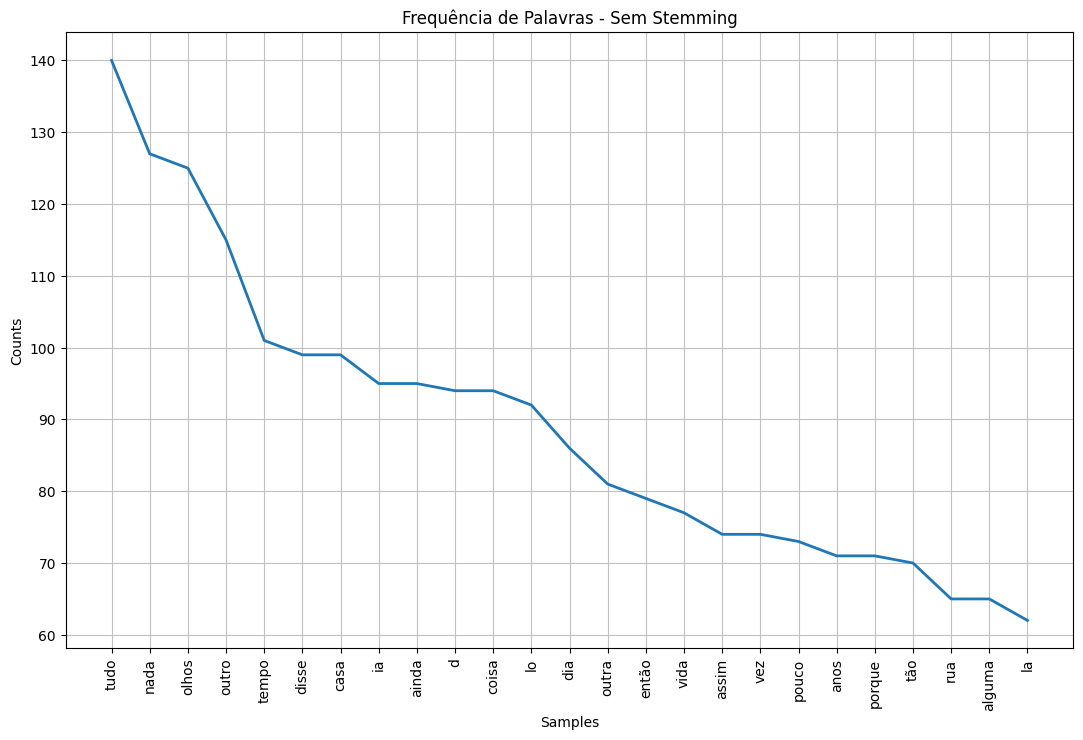

<Axes: title={'center': 'Frequência de Palavras - Sem Stemming'}, xlabel='Samples', ylabel='Counts'>

In [28]:
plt.figure(figsize = (13, 8))
freq_sem_stem.plot(25, title = "Frequência de Palavras - Sem Stemming")

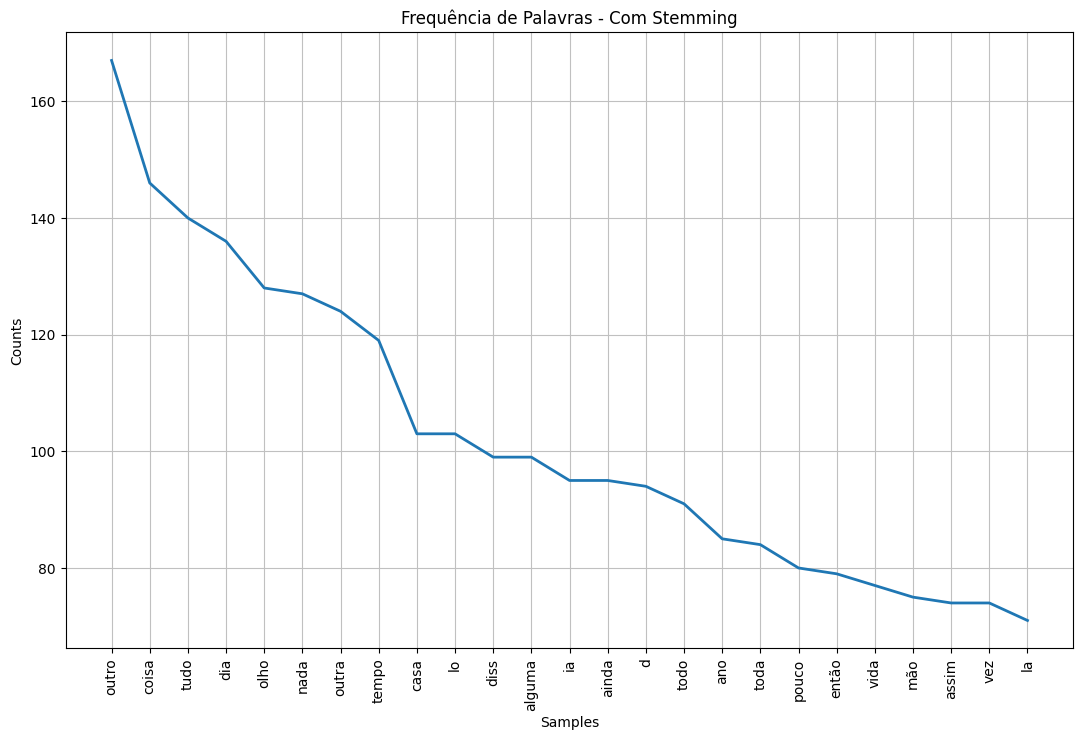

<Axes: title={'center': 'Frequência de Palavras - Com Stemming'}, xlabel='Samples', ylabel='Counts'>

In [29]:
plt.figure(figsize = (13, 8))
freq_com_stem.plot(25, title = "Frequência de Palavras - Com Stemming")